In [124]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [125]:
#这里chaosss表示使用最后20步的平均距离，而chaos也是，但是忘记对混沌度归一化了，检查发现混沌度不归一化相对残差会很小，但是意外的效果很好，不知道为啥

In [126]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'f': """
    [0.12463448178758348, 0.14798960440088277, 0.22486914320804718, 0.3353172914331064, 0.04895771688560899, 0.11213612358502811, 0.28480477677018234, 0.3187081806324324, 0.2995558173415721, 0.29027115544427645]
    Error u of fuhe active learning(LHS sampling): 2.187244e-01
    [0.00705078810662983, 0.008881746837945025, 0.015680346193459004, 0.02886244413833859, 0.00278816971436536, 0.006136807762686733, 0.023484570644458733, 0.027120837200948836, 0.026744737498449904, 0.02324178977416753]
    MAE of fuhe active learning(LHS sampling): 1.699922e-02
    [0.005862603142119275, 0.008265640079077916, 0.01908419309635283, 0.04243517238062584, 0.0009045995865787871, 0.004745753205823981, 0.030613191621766074, 0.03833544369078137, 0.033866443216090204, 0.031799613037371756]
    MSE of fuhe active learning(LHS sampling): 2.159127e-02
    """,
    'd': """
    [0.3846828237599971, 0.4057673295513748, 0.09533352721650631, 0.06663706810023058, 0.05538250599499043, 0.0726402619532176, 0.13716993778606365, 0.13480670251570098, 0.07390132414841973, 0.24215416134840095]
    Error u of fuhe active learning(LHS sampling): 1.668476e-01
    [0.03971781600666478, 0.041700095207111126, 0.005928855252858696, 0.0038480007956718746, 0.0028901093662905076, 0.003814606265706635, 0.007809145907613248, 0.007991813874921509, 0.004081169564046871, 0.016833163743412278]
    MAE of fuhe active learning(LHS sampling): 1.346148e-02
    [0.0558495479792267, 0.06213956739094921, 0.0034300890504194016, 0.001675891249254928, 0.0011576020260240382, 0.0019914475616785486, 0.007101203446260152, 0.006858624761946201, 0.0020611923027134354, 0.022130842386279003]
    MSE of fuhe active learning(LHS sampling): 1.643960e-02
    """,
    'dd': """
    [0.036312318894378935, 0.2961812646203898, 0.0934615553033133, 0.42943369451542984, 0.05600847821650149, 0.2822919254291629, 0.0068700809080372745, 0.002333519093938641, 0.3373623908499726, 0.3287382628447124]
    Error u of fuhe active learning(LHS sampling): 1.868993e-01
    [0.0027196317050738263, 0.024341689368582022, 0.004851856274749346, 0.04719734004844059, 0.003284063950765183, 0.022513248015113337, 0.0010510745869465662, 0.00046911624031005105, 0.029054760955203585, 0.028711337289073408]
    MAE of fuhe active learning(LHS sampling): 1.641941e-02
    [0.0004976477436286188, 0.033107717292010494, 0.0032967049456180835, 0.06959952994649514, 0.001183917983395741, 0.030075370331421967, 1.7813029013822053e-05, 2.055118125062805e-06, 0.042954374919069865, 0.04078632575809751]
    MSE of fuhe active learning(LHS sampling): 2.215215e-02
    """,
    'pd': """
    [0.020182642396985372, 0.2626868666290376, 0.07394612270101478, 0.3439371473932192, 0.0052082457966957105, 0.04774470651131973, 0.5072807738660671, 0.32445878639333964, 0.0834995338680386, 0.043481862896349935]
    Error u of fuhe active learning(LHS sampling): 1.712427e-01
    [0.0012396135519932882, 0.019463142406719314, 0.004243282392985698, 0.032370960340807976, 0.0003627263965198811, 0.0025069590571177355, 0.06405387841528207, 0.02967918207308838, 0.0045795371304895565, 0.002358569294432202]
    MAE of fuhe active learning(LHS sampling): 1.608579e-02
    [0.00015373406910276693, 0.026042986887137756, 0.0020636920256982645, 0.04464493979811096, 1.0237573102604629e-05, 0.0008603289318577404, 0.09712049276820883, 0.039731334339735, 0.0026313715446657747, 0.0007135597694186118]
    MSE of fuhe active learning(LHS sampling): 2.139727e-02
    """,
    # 'qf+r+c': """
    # [0.0024771764343731063, 0.0048000342695453556, 0.002703518910665728, 0.005841471610315474, 0.0018433419316947542, 0.0019390163043488382, 0.0017595717382733614, 0.0024797759628009002, 0.0014783335735052726, 0.001401926851427393]
    # Error u of fuhe active learning(LHS sampling): 2.672417e-03
    # [0.00041290430533344024, 0.0006884685392972895, 0.0005251188791774388, 0.001572628682710307, 0.0003233916506616035, 0.0006211754490918562, 0.0005451668213997481, 0.00046156759938133744, 0.00037007050383825677, 0.0005317655240660335]
    # MAE of fuhe active learning(LHS sampling): 6.052258e-04
    # [2.315943454645556e-06, 8.695663951320436e-06, 2.75849940949375e-06, 1.2878302217731222e-05, 1.2824069901346807e-06, 1.4189823503238834e-06, 1.168498145705158e-06, 2.320806668764929e-06, 8.248195609039247e-07, 7.417623396246443e-07]
    # MSE of fuhe active learning(LHS sampling): 3.440569e-06
    # """,
    'f+wqf+r': """
    [0.22856842817766954, 0.00284372314996774, 0.02882337821862293, 0.005940529438581423, 0.023494196495576897, 0.005230674040421236, 0.004264242275362486, 0.22448835872618764, 0.03075368280634572, 0.019451994688359345]
    Error u of fuhe active learning(LHS sampling): 5.738592e-02
    [0.019455957893637365, 0.0004272203713414992, 0.0019174374355407937, 0.001001233768748605, 0.002251377732951529, 0.0008651678678262281, 0.0006452989112368517, 0.01849621404665953, 0.002746362056777624, 0.001704703632377997]
    MAE of fuhe active learning(LHS sampling): 4.951097e-03
    [0.01971725963964158, 3.0520293013231935e-06, 0.00031354785419453776, 1.3318777894219027e-05, 0.00020832206181109868, 1.0325934973219803e-05, 6.862744251212442e-06, 0.019019614989444752, 0.0003569507783659247, 0.0001428046524020273]
    MSE of fuhe active learning(LHS sampling): 3.979206e-03
    """,
    'd+wqf+r': """
    [0.003073302149325749, 0.039239424356502205, 0.2213950281003931, 0.002981114148995712, 0.00787924623918835, 0.00441538389814451, 0.010847296677020021, 0.00975958893167497, 0.05440257836244726, 0.31237022204949066]
    Error u of fuhe active learning(LHS sampling): 6.663632e-02
    [0.001070679093102269, 0.0035829840629446096, 0.01562857197647025, 0.00046447876772296066, 0.0014223083432804318, 0.0010248884798188342, 0.0028422184072856914, 0.000989969550661963, 0.004200682048370314, 0.02915199978798082]
    MAE of fuhe active learning(LHS sampling): 6.037878e-03
    [3.5647131745516904e-06, 0.0005811113087437917, 0.018499065884003615, 3.354063522528247e-06, 2.3430600436228133e-05, 7.357851373057327e-06, 4.44075801856015e-05, 3.594819786672292e-05, 0.001116999653072308, 0.036825896180113074]
    MSE of fuhe active learning(LHS sampling): 5.714114e-03
    """,
    'dd+wqf+r': """
    [0.011639230315272586, 0.008739998447011503, 0.0031182968246693814, 0.28883622521731306, 0.011658850903294046, 0.16722405469329638, 0.006026256362881305, 0.659037184443721, 0.007932863194549297, 0.08895709700571856]
    Error u of fuhe active learning(LHS sampling): 1.253170e-01
    [0.001102485030271382, 0.0009551369410666387, 0.0005569445758305879, 0.024174442214027595, 0.0021103625095766883, 0.011319226502274215, 0.0009592033116308517, 0.1317490364420326, 0.0011083373586132216, 0.0059948368859685155]
    MAE of fuhe active learning(LHS sampling): 1.800300e-02
    [5.112844634514106e-05, 2.8829478255972017e-05, 3.669855605517023e-06, 0.031485992888959445, 5.130096904488166e-05, 0.010553865885593714, 1.3705954253535006e-05, 0.16392074162385356, 2.3750568057139225e-05, 0.0029865877233763603]
    MSE of fuhe active learning(LHS sampling): 2.091196e-02
    """,
    'pd+wqf+r': """
    [0.01487975816076764, 0.004425147116743381, 0.010574108555368734, 0.22709678946406597, 0.020701436545781913, 0.019417850968012143, 0.0077100090827258334, 0.020900760934280137, 0.015687836904105336, 0.0016830492230150448]
    Error u of fuhe active learning(LHS sampling): 3.430767e-02
    [0.002501183786816907, 0.0005434639375414548, 0.002125591600945597, 0.055775278025791124, 0.003041072538431163, 0.0018689604687829814, 0.0010587622169099594, 0.0020815562619556347, 0.0022139316375456497, 0.0005320335767621574]
    MAE of fuhe active learning(LHS sampling): 7.174183e-03
    [8.356142110447676e-05, 7.390426449028627e-06, 4.219894574123838e-05, 0.019464177699755524, 0.00016173910639201536, 0.00014230376774501753, 2.243488517968507e-05, 0.00016486872044663706, 9.288384885203617e-05, 1.0690738513779014e-06]
    MSE of fuhe active learning(LHS sampling): 2.018263e-03
    """,


    'f+qf': """
    [0.007740640000099794, 0.009321334797736652, 0.03685115305808023, 0.4354647279213129, 0.40836197430166254, 0.3422244632389851, 0.0266266946427793, 0.016247999782455724, 0.01743248541883652, 0.015296715873976583]
    Error u of fuhe active learning(LHS sampling): 1.315568e-01
    [0.0022959982770427902, 0.002656691758604477, 0.0074105136843252714, 0.08576819174384535, 0.1478590976389048, 0.04872703460356129, 0.003214909500136509, 0.0018344219339474104, 0.005282416134096816, 0.003344196473015817]
    MAE of fuhe active learning(LHS sampling): 3.083935e-02
    [2.2613501362773517e-05, 3.2792179741044314e-05, 0.0005125263927465984, 0.07156819082418761, 0.06293680056690514, 0.04420141514184119, 0.0002675768811963494, 9.963544871316255e-05, 0.00011469188566173086, 8.831011939359816e-05]
    MSE of fuhe active learning(LHS sampling): 1.798446e-02
    """,
    'd+qf': """
    [0.00469301907158501, 0.36877776212129354, 0.008300666550841001, 0.21915524561142471, 0.2329187145894202, 0.01042906754980788, 0.5865273365067676, 0.05056978841057446, 0.04168276511597679, 0.03167467841408275]
    Error u of fuhe active learning(LHS sampling): 1.554729e-01
    [0.0012233450545575113, 0.10068076044624145, 0.003209650107243257, 0.054851393667364384, 0.05799655320706228, 0.002102998927345151, 0.2158530155486196, 0.01705652296639066, 0.005781376015316897, 0.005692420689720146]
    MAE of fuhe active learning(LHS sampling): 4.644480e-02
    [8.312252171204167e-06, 0.05132672107087416, 2.6003991047872604e-05, 0.01812666097928299, 0.02047494959255969, 4.1049231667318554e-05, 0.1298346430694103, 0.0009651533998226177, 0.0006557331114525573, 0.0003786504701591552]
    MSE of fuhe active learning(LHS sampling): 2.218379e-02
    """,
    'dd+qf': """
    [0.014633766600839149, 0.41278397253174653, 0.004431646027365364, 0.019972502042698365, 0.23609441030531855, 0.004963555093074893, 0.2536738806889486, 0.04094202238545633, 0.26737473077522994, 0.06501615194791213]
    Error u of fuhe active learning(LHS sampling): 1.319887e-01
    [0.00689890780588599, 0.16698349298985346, 0.0012786461095793645, 0.0025480645092278344, 0.058711590080535024, 0.0017710446518684672, 0.07741399007255477, 0.004368838004044392, 0.06830051316942365, 0.008535099111497827]
    MAE of fuhe active learning(LHS sampling): 3.968102e-02
    [8.082139084985707e-05, 0.0643072183633728, 7.4121500160260775e-06, 0.00015054939699385778, 0.021037081129851854, 9.29821887986062e-06, 0.024286536099903052, 0.0006326341834337293, 0.02698079811991189, 0.0015953522724961725]
    MSE of fuhe active learning(LHS sampling): 1.390877e-02
    """,
    'pd+qf': """
    [0.43279655073652346, 0.24410356553032328, 0.0021895866600023842, 0.22323676555310715, 0.31969874725490277, 0.43214977408647454, 0.2558365652278178, 0.1747404582359899, 0.008571513127602182, 0.3269753089769248]
    Error u of fuhe active learning(LHS sampling): 2.420299e-01
    [0.12917197691277654, 0.04451072853157664, 0.0008424684723980208, 0.039310330047005036, 0.10694739529430182, 0.14680303112322068, 0.07444423535732374, 0.03887080871420604, 0.0030559434506448957, 0.09310024595056465]
    MAE of fuhe active learning(LHS sampling): 6.770572e-02
    [0.07069385319117863, 0.022488594724377205, 1.8094156771367878e-06, 0.018808125531979896, 0.03857411232797233, 0.07048271948942807, 0.02470240873056435, 0.011523940635067245, 2.7728671394586156e-05, 0.0403500418522089]
    MSE of fuhe active learning(LHS sampling): 2.976533e-02
    """,


    'f+qf+r': """
    [0.0023041800773261865, 0.002598473414952567, 0.003499490961685658, 0.0014762362113939945, 0.001813398096102351, 0.006562048384434259, 0.00242739510184586, 0.005055722705317822, 0.005311181164669902, 0.01328558104015223]
    Error u of fuhe active learning(LHS sampling): 4.433371e-03
    [0.00047070227889979153, 0.0005186878018950845, 0.0006912971558816943, 0.0005494175986714765, 0.0004731835893216483, 0.0012647217986676976, 0.000982754225072413, 0.0012743258234056076, 0.0013492200530163315, 0.0014933993170163033]
    MAE of fuhe active learning(LHS sampling): 9.067710e-04
    [2.0037655531809195e-06, 2.5483004308408355e-06, 4.621934900572689e-06, 8.224808219879531e-07, 1.24108173084603e-06, 1.625148039968346e-05, 2.2237963566055524e-06, 9.646739779605129e-06, 1.064624123752601e-05, 6.661548245937151e-05]
    MSE of fuhe active learning(LHS sampling): 1.166213e-05
    """,
    'd+qf+r': """
    [0.003325954661525892, 0.008184404668664035, 0.004494800649584076, 0.002419296959898673, 0.08404498580716342, 0.0027543969266684305, 0.0010390760046175024, 0.010028834460514419, 0.05231698300886854, 0.09546923309020515]
    Error u of fuhe active learning(LHS sampling): 2.640780e-02
    [0.0012846111973105264, 0.0019371767558250851, 0.0008234978079393809, 0.00047955556876663215, 0.008006084221669856, 0.001058855993606681, 0.0003079258106604848, 0.0017634019593784774, 0.003360317313065764, 0.006956564394428405]
    MAE of fuhe active learning(LHS sampling): 2.597799e-03
    [4.174906189870655e-06, 2.528065143547662e-05, 7.624913860202969e-06, 2.2089832931181173e-06, 0.0026658621477811, 2.8633017722473e-06, 4.0748225736873465e-07, 3.795902050426067e-05, 0.001032997937836207, 0.0034398613634622345]
    MSE of fuhe active learning(LHS sampling): 7.219241e-04
    """,
    'dd+qf+r': """
    [0.013481383660450963, 0.007040902538308789, 0.004540887783365166, 0.004725893047868611, 0.00243942636482379, 0.001088892477933247, 0.005840590945285093, 0.0028040104298801887, 0.005813435820484399, 0.006072263544111372]
    Error u of fuhe active learning(LHS sampling): 5.384769e-03
    [0.0038860859757911216, 0.0010495218934701465, 0.0010885279258772591, 0.0010077345686079226, 0.0006144998883735202, 0.00041836235696102614, 0.0022516484998676926, 0.0008232299426773248, 0.0008480688302975513, 0.0013575008112651874]
    MAE of fuhe active learning(LHS sampling): 1.334518e-03
    [6.859350710017831e-05, 1.8709868596655037e-05, 7.782078564121091e-06, 8.42911248662749e-06, 2.2458952591396146e-06, 4.4749075489099944e-07, 1.2874419423721175e-05, 2.9673810661167244e-06, 1.275498159872814e-05, 1.3916028077504401e-05]
    MSE of fuhe active learning(LHS sampling): 1.487208e-05
    """,
    'pd+qf+r': """
    [0.0023478710521932936, 0.04006408213701764, 0.05578478458839002, 0.008606236267175708, 0.002526953491444027, 0.011715808808768272, 0.0012125013343273284, 0.0016283300756752966, 0.05044866918070187, 0.0058062194552124195]
    Error u of fuhe active learning(LHS sampling): 1.801415e-02
    [0.0008799766830171232, 0.003546691473942929, 0.013269631888541187, 0.001245561568344176, 0.0004811399948126574, 0.0016619404957454982, 0.000520842407628814, 0.0005089383110108278, 0.004203670005342165, 0.0012096008241783763]
    MAE of fuhe active learning(LHS sampling): 2.752799e-03
    [2.0804752535331617e-06, 0.0006057933016544629, 0.0011744799107251355, 2.7953783743926334e-05, 2.4099529811957385e-06, 5.180344279606536e-05, 5.548537457559001e-07, 1.0006886196872352e-06, 0.0009605356765239172, 1.2723335088663302e-05]
    MSE of fuhe active learning(LHS sampling): 2.839335e-04
    """,


    'f+qf+cc': """
    [0.0036229036106066276, 0.0038685800639825744, 0.0010218622578794991, 0.0034851037584339136, 0.005615921453679316, 0.015881091176696626, 0.006052061406578071, 0.0121845492726194, 0.0030890207547194593, 0.003139499442695193]
    Error u of fuhe active learning(LHS sampling): 5.796059e-03
    [0.0011654595158830093, 0.00042485309293049516, 0.0004065021407643414, 0.0007201724912701334, 0.0009086050390901726, 0.0015043189127639692, 0.001962326434618527, 0.001615446212013441, 0.0010960440388141164, 0.0008013489030754923]
    MAE of fuhe active learning(LHS sampling): 1.060508e-03
    [4.9536763786544915e-06, 5.648293435004694e-06, 3.940930624790452e-07, 4.584009370263213e-06, 1.1902991453590815e-05, 9.518636673508145e-05, 1.382358615628058e-05, 5.603159804210889e-05, 3.6012703417224073e-06, 3.7199310693998124e-06]
    MSE of fuhe active learning(LHS sampling): 1.998458e-05
    """,
    'd+qf+cc': """
    [0.0019275508581900471, 0.008401101094131985, 0.39009396939607166, 0.009365983725771226, 0.005721439682248373, 0.009538924747841133, 0.010296991092902096, 0.00435844572043775, 0.0017283873143623025, 0.03951834208268972]
    Error u of fuhe active learning(LHS sampling): 4.809511e-02
    [0.0007095427993418748, 0.0016500689616454258, 0.15132643804426826, 0.0014965780323856926, 0.000734256180343558, 0.0012452771945630121, 0.0017983482584486806, 0.0008292073750683374, 0.0005547399506519365, 0.006042555778248431]
    MAE of fuhe active learning(LHS sampling): 1.663870e-02
    [1.4022510155351802e-06, 2.6637072541559063e-05, 0.057431815445410234, 3.310707933198824e-05, 1.2354487076410672e-05, 3.4340998390696186e-05, 4.001609873726559e-05, 7.1693099277894925e-06, 1.1274471991885692e-06, 0.0005894018632518025]
    MSE of fuhe active learning(LHS sampling): 5.817737e-03
    """,
    'dd+qf+cc': """
    [0.18421235439807043, 0.007694384489799012, 0.18729701148097452, 0.006426343072259943, 0.0038046610801097487, 0.003319877497674225, 0.01690273525974729, 0.002286593602243911, 0.006583389242360814, 0.008311833398779422]
    Error u of fuhe active learning(LHS sampling): 4.268392e-02
    [0.048163432176574074, 0.001141094426569071, 0.041852601357071056, 0.0007921703084864566, 0.0008053518763723614, 0.0005180707133590163, 0.002529756489824472, 0.0010609808110248987, 0.0007722402322158218, 0.0010485803236811703]
    MAE of fuhe active learning(LHS sampling): 9.868428e-03
    [0.012807122936442056, 2.234404721617918e-05, 0.01323962753550801, 1.5586258880687022e-05, 5.463186461142546e-06, 4.159663402667973e-06, 0.00010782713115802233, 1.9732951110528603e-06, 1.6357357245629505e-05, 2.6074004205787318e-05]
    MSE of fuhe active learning(LHS sampling): 2.624654e-03
    """,
    'pd+qf+cc': """
    [0.010612073362834705, 0.010689128320846543, 0.005858065567287892, 0.06163885965111808, 0.0036150852583693993, 0.009717356914561649, 0.005595891664679995, 1.0583041810188685, 0.006423876196314455, 0.003613908256789206]
    Error u of fuhe active learning(LHS sampling): 1.176068e-01
    [0.0027750020936091564, 0.002091563766038584, 0.0011940614806080915, 0.007828003922683228, 0.0011119418563521305, 0.0016401147704956224, 0.0009802236443826847, 0.5649614271660783, 0.000918175823905078, 0.0005737184122316853]
    MAE of fuhe active learning(LHS sampling): 5.840742e-02
    [4.250250813630034e-05, 4.312197597583634e-05, 1.2951573318029499e-05, 0.0014339145209182277, 4.932319036005163e-06, 3.563775852520544e-05, 1.181823626465082e-05, 0.4227027717720284, 1.5574295004213437e-05, 4.929107824191129e-06]
    MSE of fuhe active learning(LHS sampling): 4.243082e-02
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

      Method   Metric                                             Values
0          f  Error_u  [0.12463448178758348, 0.14798960440088277, 0.2...
1          f      MAE  [0.00705078810662983, 0.008881746837945025, 0....
2          f      MSE  [0.005862603142119275, 0.008265640079077916, 0...
3          d  Error_u  [0.3846828237599971, 0.4057673295513748, 0.095...
4          d      MAE  [0.03971781600666478, 0.041700095207111126, 0....
5          d      MSE  [0.0558495479792267, 0.06213956739094921, 0.00...
6         dd  Error_u  [0.036312318894378935, 0.2961812646203898, 0.0...
7         dd      MAE  [0.0027196317050738263, 0.024341689368582022, ...
8         dd      MSE  [0.0004976477436286188, 0.033107717292010494, ...
9         pd  Error_u  [0.020182642396985372, 0.2626868666290376, 0.0...
10        pd      MAE  [0.0012396135519932882, 0.019463142406719314, ...
11        pd      MSE  [0.00015373406910276693, 0.026042986887137756,...
12   f+wqf+r  Error_u  [0.22856842817766954, 0.0028

In [127]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'd', 'dd', 'pd', 'f+wqf+r', 'd+wqf+r', 'dd+wqf+r', 'pd+wqf+r', 'f+qf', 'd+qf', 'dd+qf', 'pd+qf', 'f+qf+r', 'd+qf+r', 'dd+qf+r', 'pd+qf+r', 'f+qf+cc', 'd+qf+cc', 'dd+qf+cc', 'pd+qf+cc']
Seeds: range(0, 10)
Loss Values: {'f': [0.12463448178758348, 0.14798960440088277, 0.22486914320804718, 0.3353172914331064, 0.04895771688560899, 0.11213612358502811, 0.28480477677018234, 0.3187081806324324, 0.2995558173415721, 0.29027115544427645], 'd': [0.3846828237599971, 0.4057673295513748, 0.09533352721650631, 0.06663706810023058, 0.05538250599499043, 0.0726402619532176, 0.13716993778606365, 0.13480670251570098, 0.07390132414841973, 0.24215416134840095], 'dd': [0.036312318894378935, 0.2961812646203898, 0.0934615553033133, 0.42943369451542984, 0.05600847821650149, 0.2822919254291629, 0.0068700809080372745, 0.002333519093938641, 0.3373623908499726, 0.3287382628447124], 'pd': [0.020182642396985372, 0.2626868666290376, 0.07394612270101478, 0.3439371473932192, 0.0052082457966957105, 0.047744

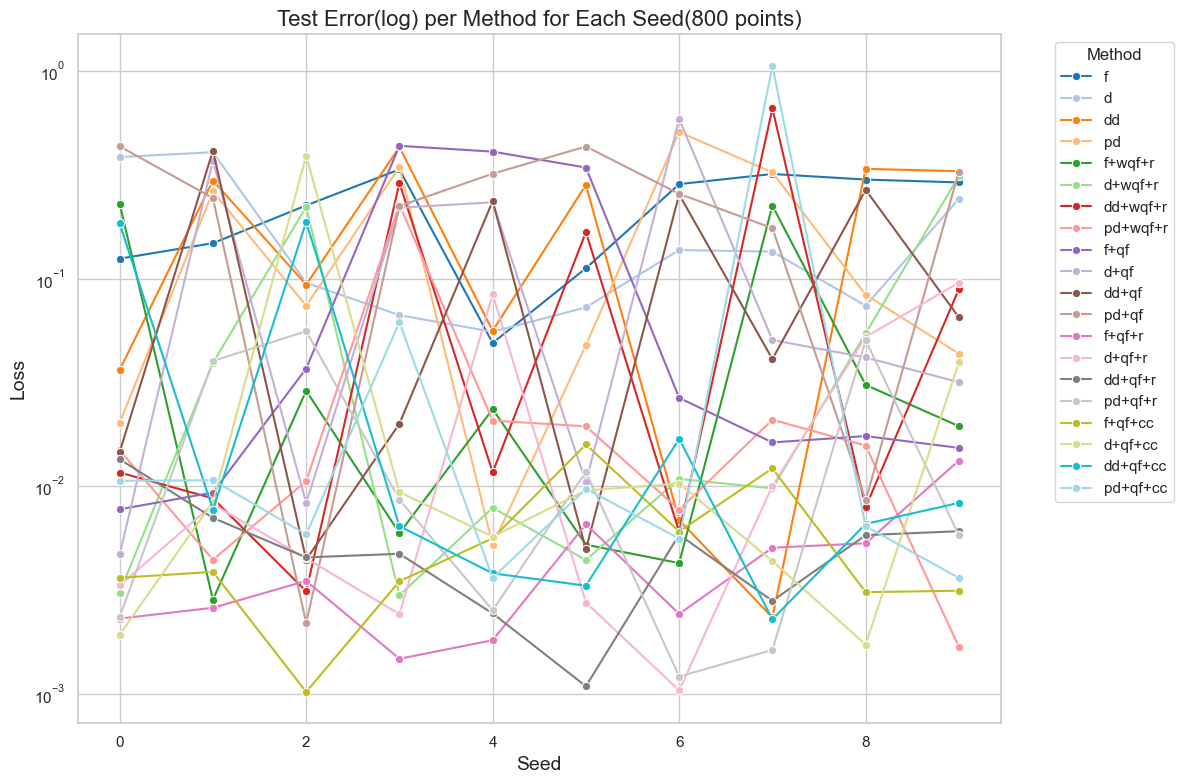

In [128]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'wqf+res','qf','f']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

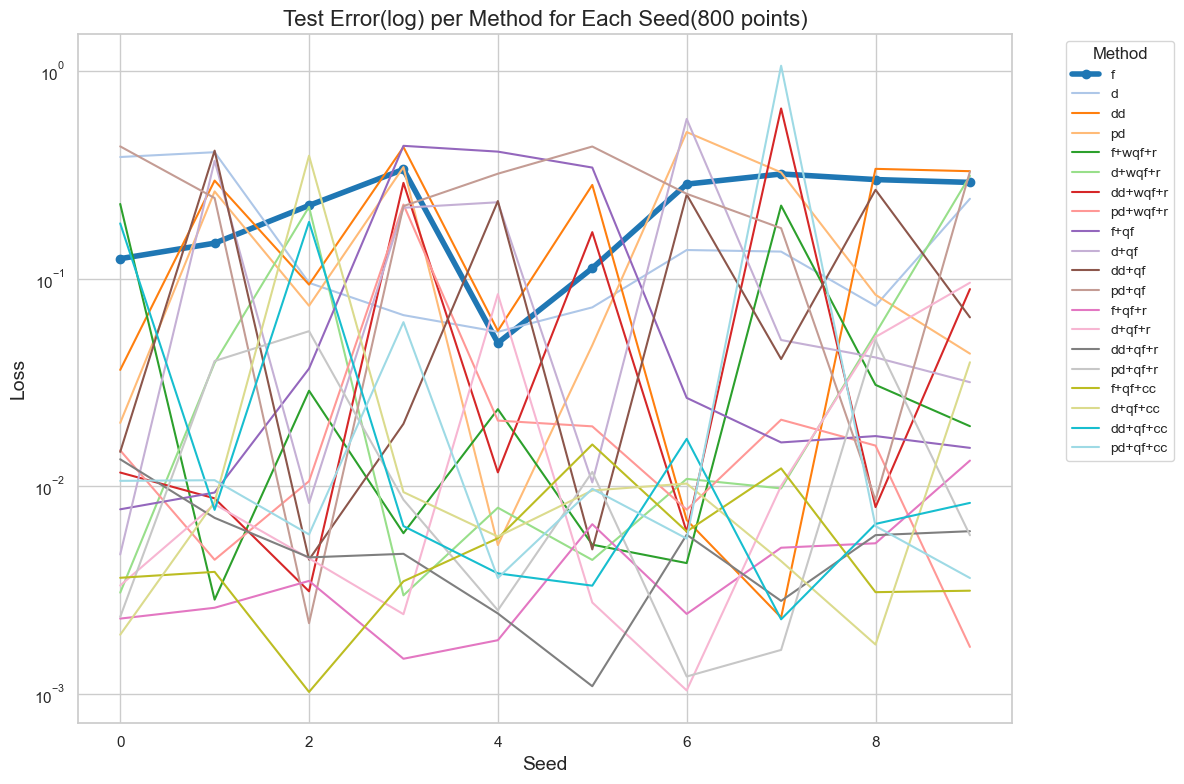

c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorch

c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorch

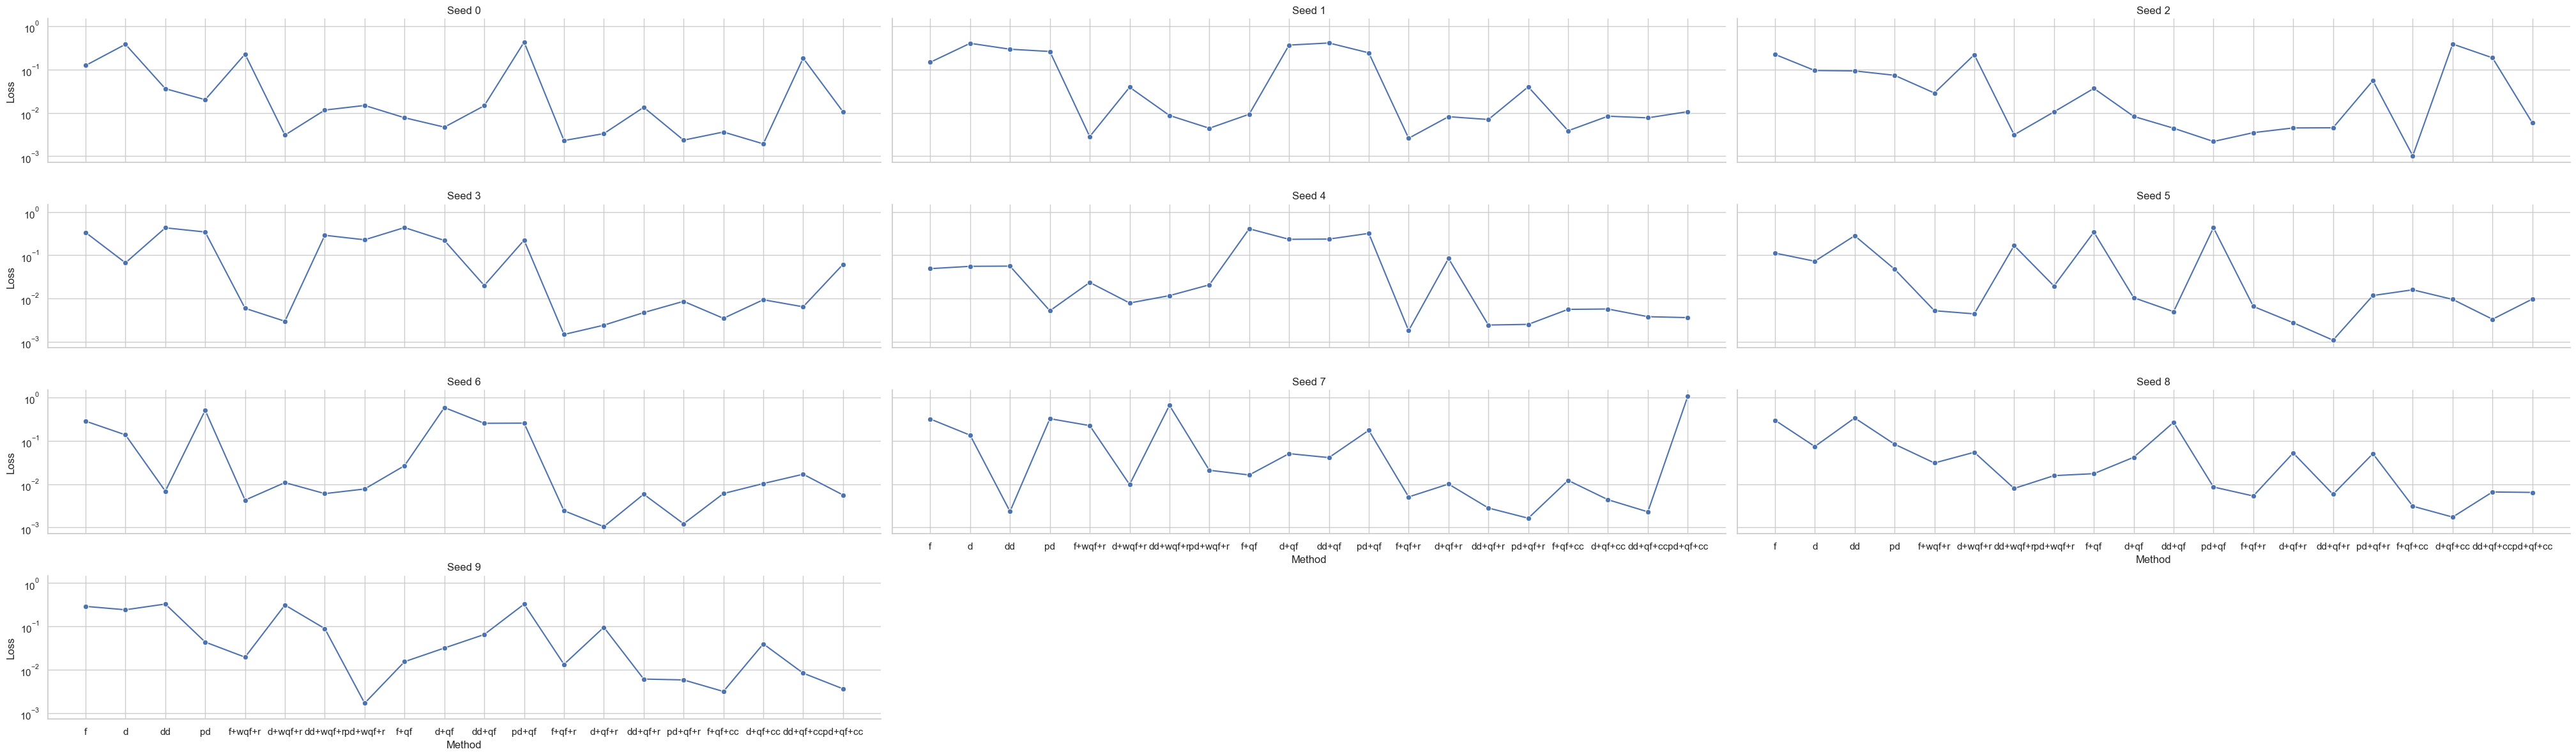

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 loss_values 是你存储所有方法和种子下的损失值的字典
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 创建 FacetGrid 来绘制每个 Seed 对应的图像
g = sns.FacetGrid(dd, col='Seed', col_wrap=3, height=3, aspect = 4.5, sharey=True)  # col_wrap 设置每行显示几幅

# 使用 lineplot 绘制每个图
g.map(sns.lineplot, 'Method', 'Loss', marker='o', palette='tab20')

# 设置纵坐标为对数尺度
g.set(yscale='log')

# 设置图形标题和标签
g.set_axis_labels('Method', 'Loss')
g.set_titles('Seed {col_name}')

# 调整图像布局
plt.tight_layout()

# 3. 显示图形
plt.show()


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


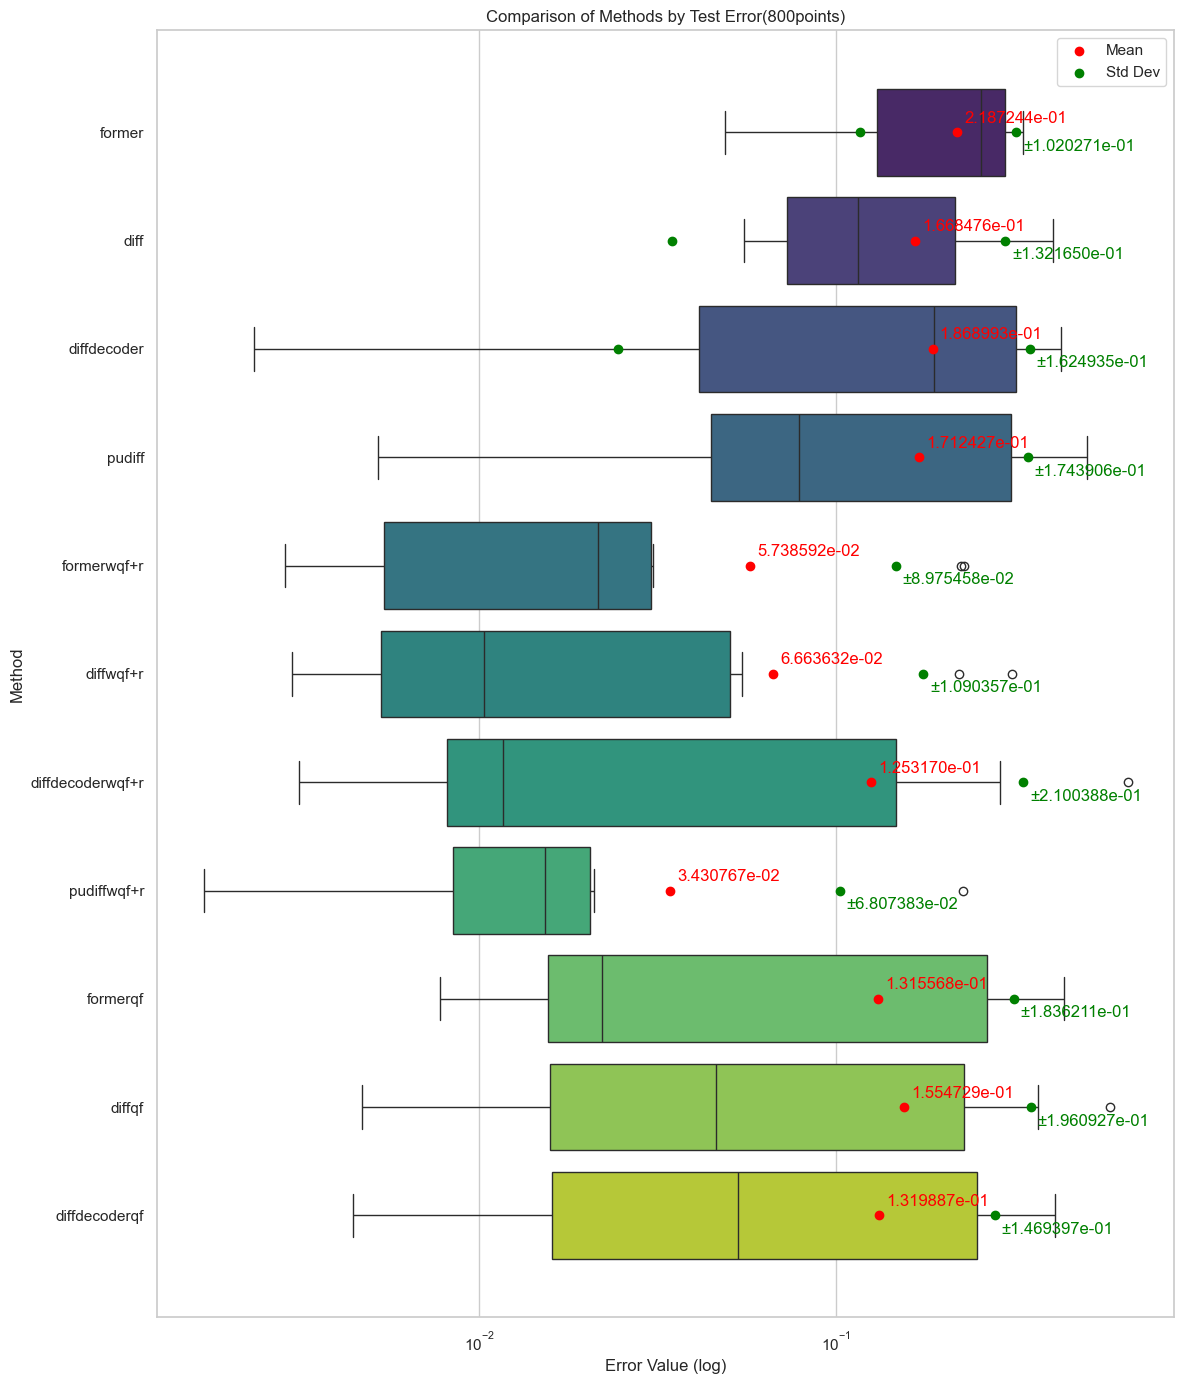

In [ ]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


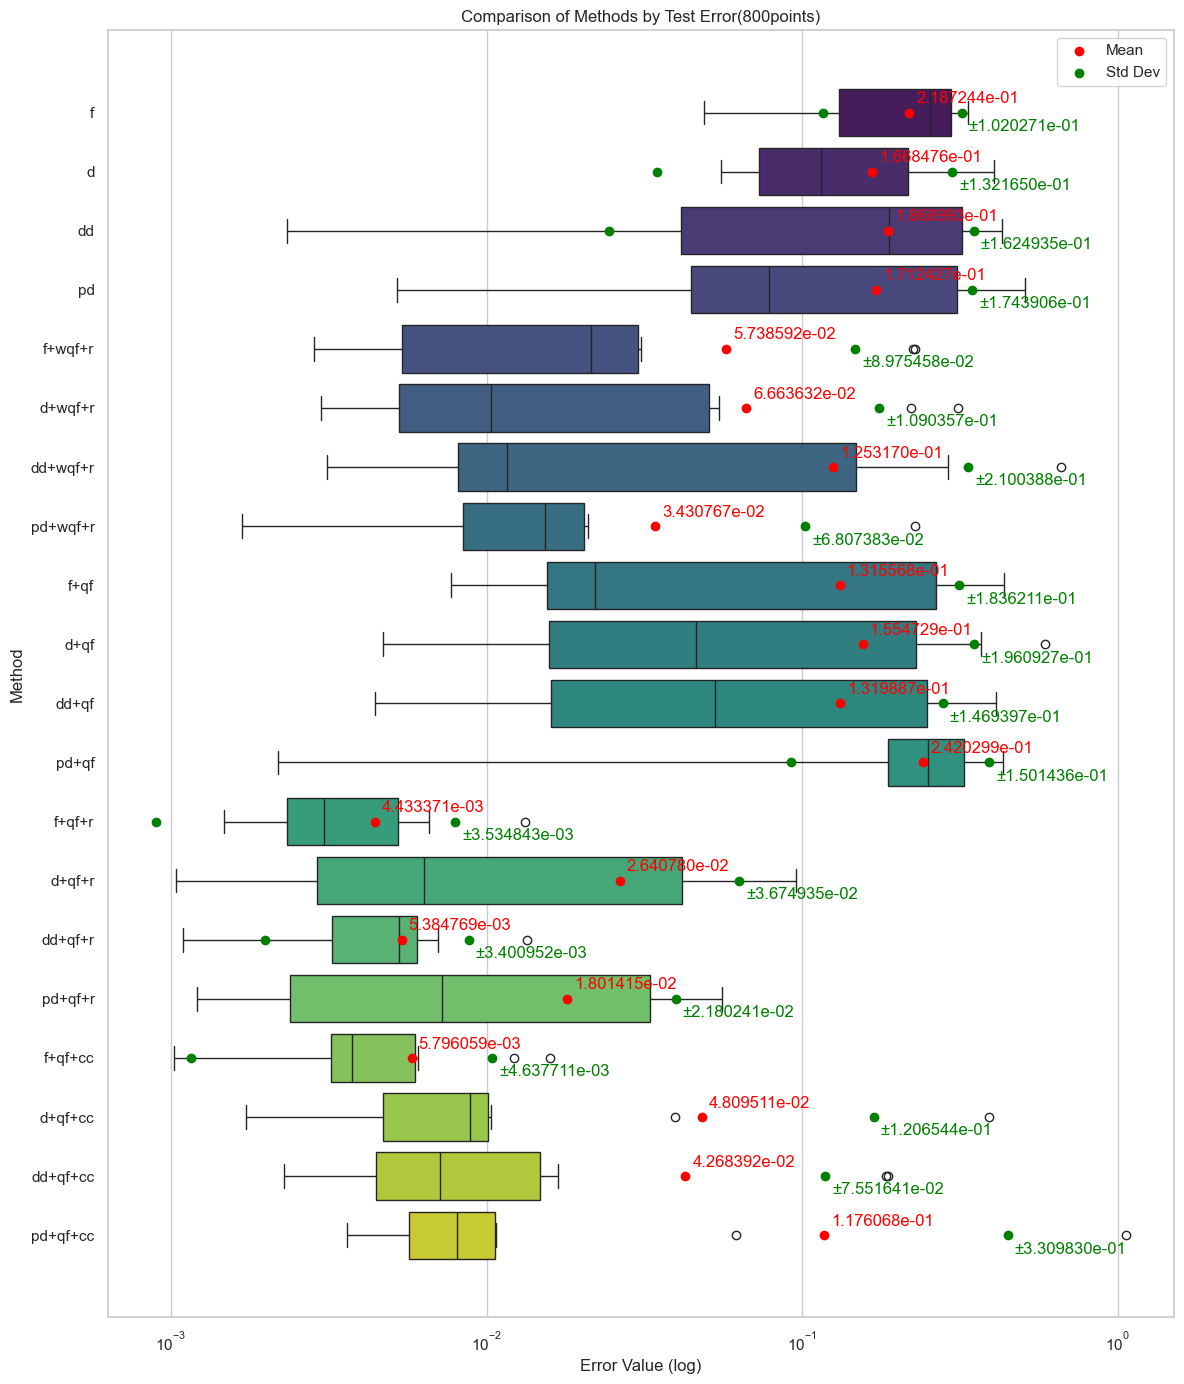

In [131]:
(2.70e-03-2.47e-03)/2.70e-03

In [132]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

0.08518518518518524

C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


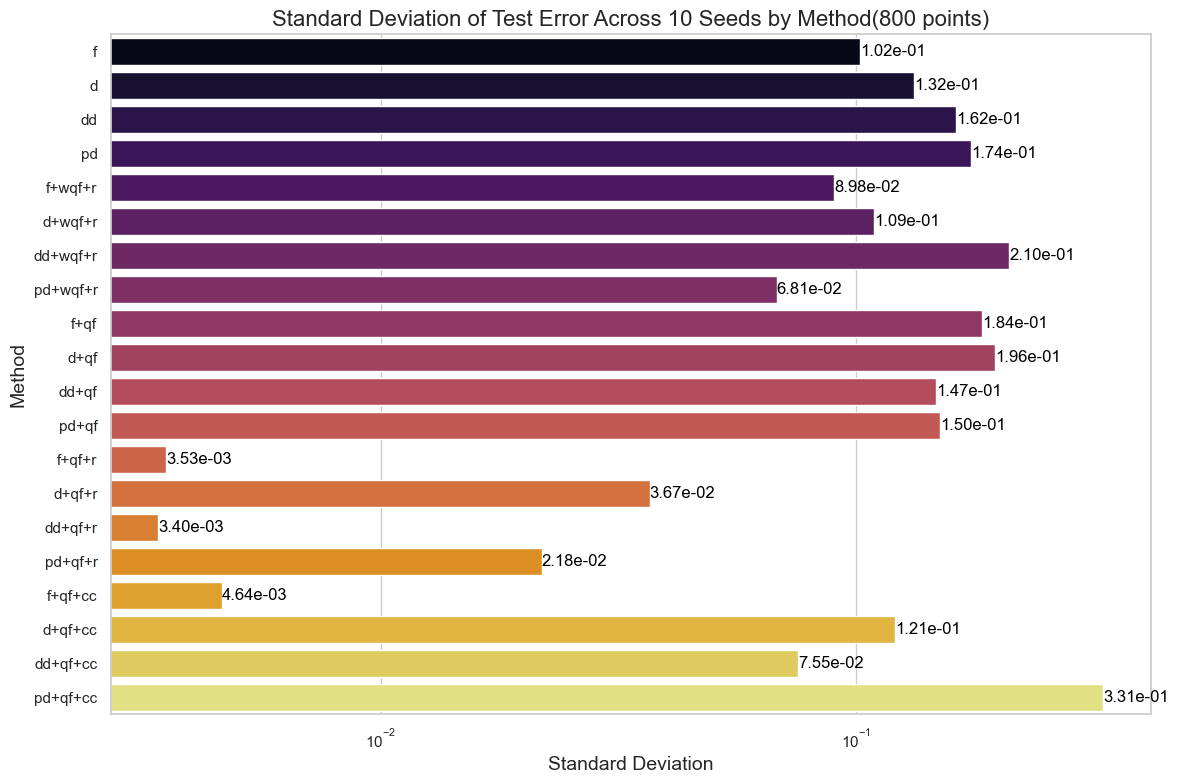

In [ ]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['former', 'diff', 'diffdecoder', 'pudiff', 'formerwqf+r', 'diffwqf+r', 'diffdecoderwqf+r', 'pudiffwqf+r', 'formerqf', 'diffqf', 'diffdecoderqf']
Seeds: range(0, 10)
Loss Values: {'former': [0.00705078810662983, 0.008881746837945025, 0.015680346193459004, 0.02886244413833859, 0.00278816971436536, 0.006136807762686733, 0.023484570644458733, 0.027120837200948836, 0.026744737498449904, 0.02324178977416753], 'diff': [0.03971781600666478, 0.041700095207111126, 0.005928855252858696, 0.0038480007956718746, 0.0028901093662905076, 0.003814606265706635, 0.007809145907613248, 0.007991813874921509, 0.004081169564046871, 0.016833163743412278], 'diffdecoder': [0.0027196317050738263, 0.024341689368582022, 0.004851856274749346, 0.04719734004844059, 0.003284063950765183, 0.022513248015113337, 0.0010510745869465662, 0.00046911624031005105, 0.029054760955203585, 0.028711337289073408], 'pudiff': [0.0012396135519932882, 0.019463142406719314, 0.004243282392985698, 0.032370960340807976, 0.0003627263

In [134]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

Methods: ['f', 'd', 'dd', 'pd', 'f+wqf+r', 'd+wqf+r', 'dd+wqf+r', 'pd+wqf+r', 'f+qf', 'd+qf', 'dd+qf', 'pd+qf', 'f+qf+r', 'd+qf+r', 'dd+qf+r', 'pd+qf+r', 'f+qf+cc', 'd+qf+cc', 'dd+qf+cc', 'pd+qf+cc']
Seeds: range(0, 10)
Loss Values: {'f': [0.00705078810662983, 0.008881746837945025, 0.015680346193459004, 0.02886244413833859, 0.00278816971436536, 0.006136807762686733, 0.023484570644458733, 0.027120837200948836, 0.026744737498449904, 0.02324178977416753], 'd': [0.03971781600666478, 0.041700095207111126, 0.005928855252858696, 0.0038480007956718746, 0.0028901093662905076, 0.003814606265706635, 0.007809145907613248, 0.007991813874921509, 0.004081169564046871, 0.016833163743412278], 'dd': [0.0027196317050738263, 0.024341689368582022, 0.004851856274749346, 0.04719734004844059, 0.003284063950765183, 0.022513248015113337, 0.0010510745869465662, 0.00046911624031005105, 0.029054760955203585, 0.028711337289073408], 'pd': [0.0012396135519932882, 0.019463142406719314, 0.004243282392985698, 0.03237096

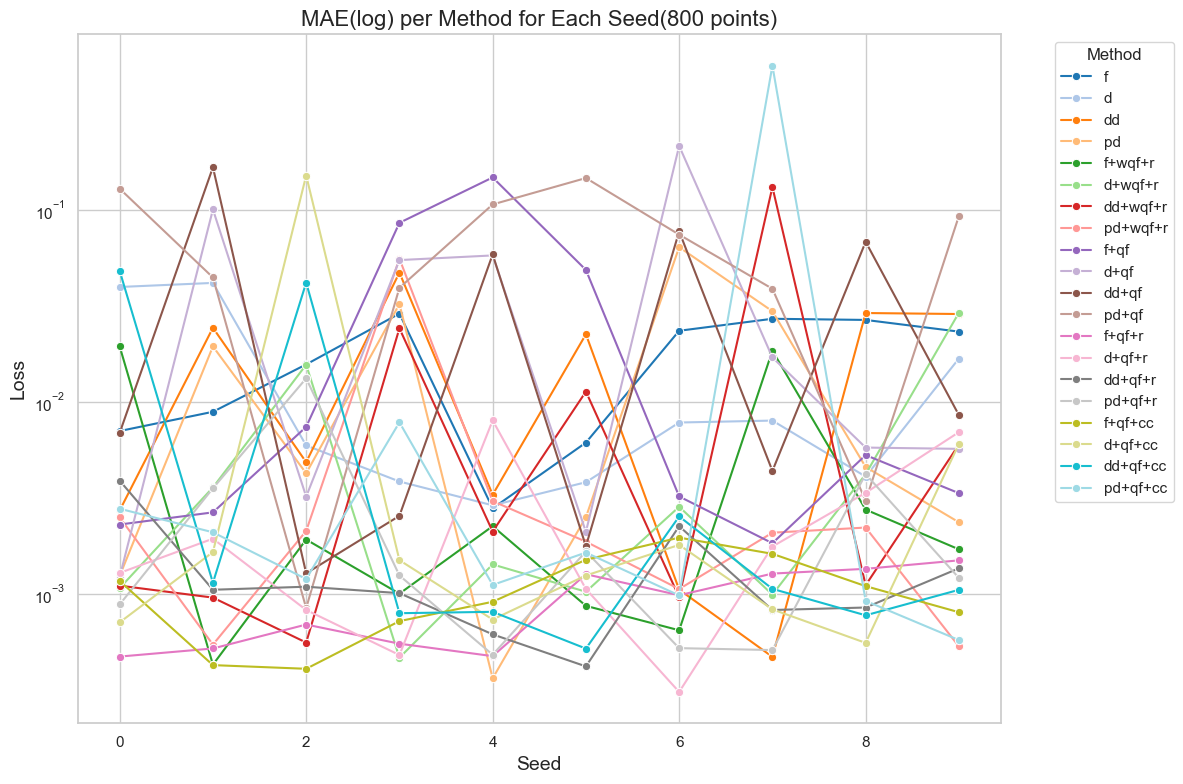

In [135]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

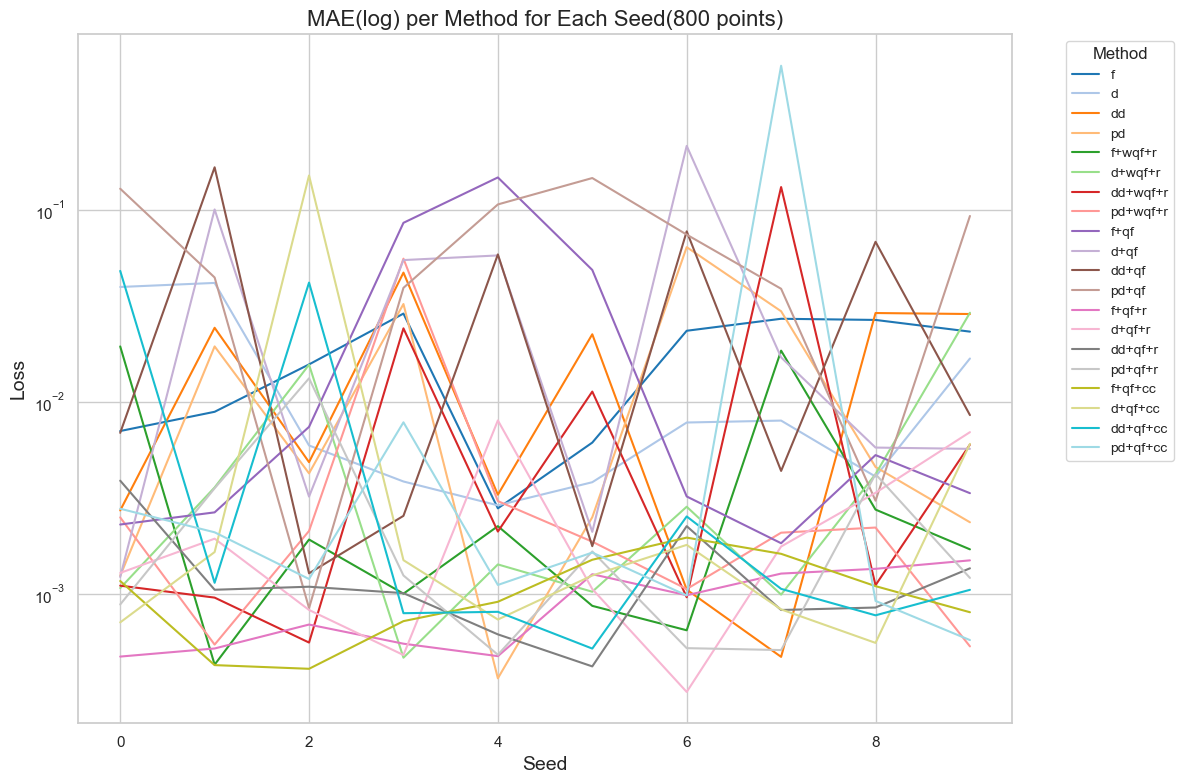

In [136]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


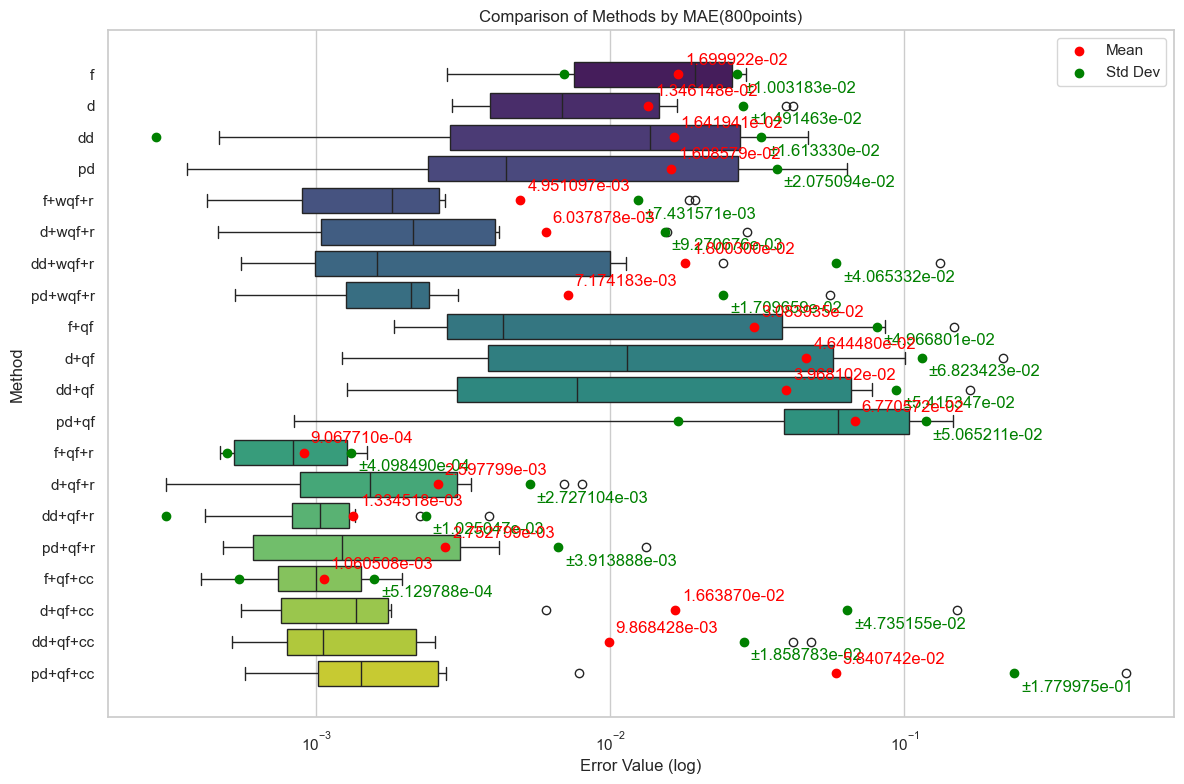

In [137]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


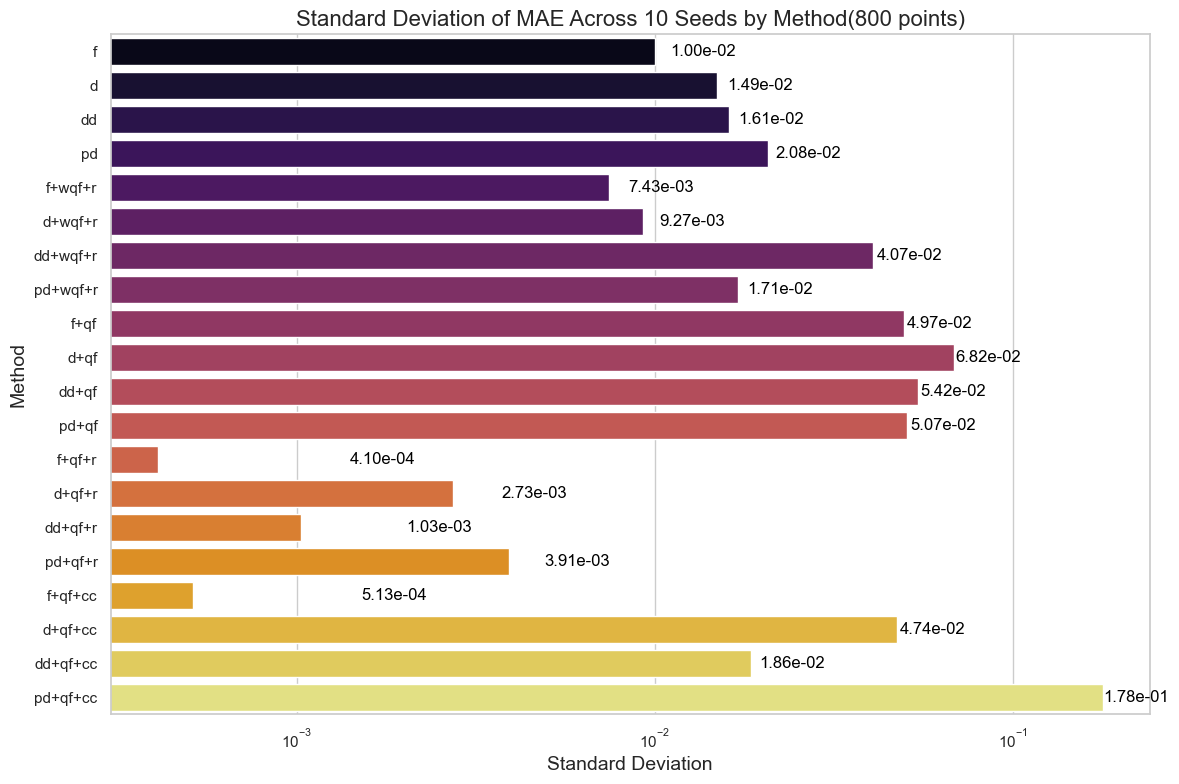

In [138]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


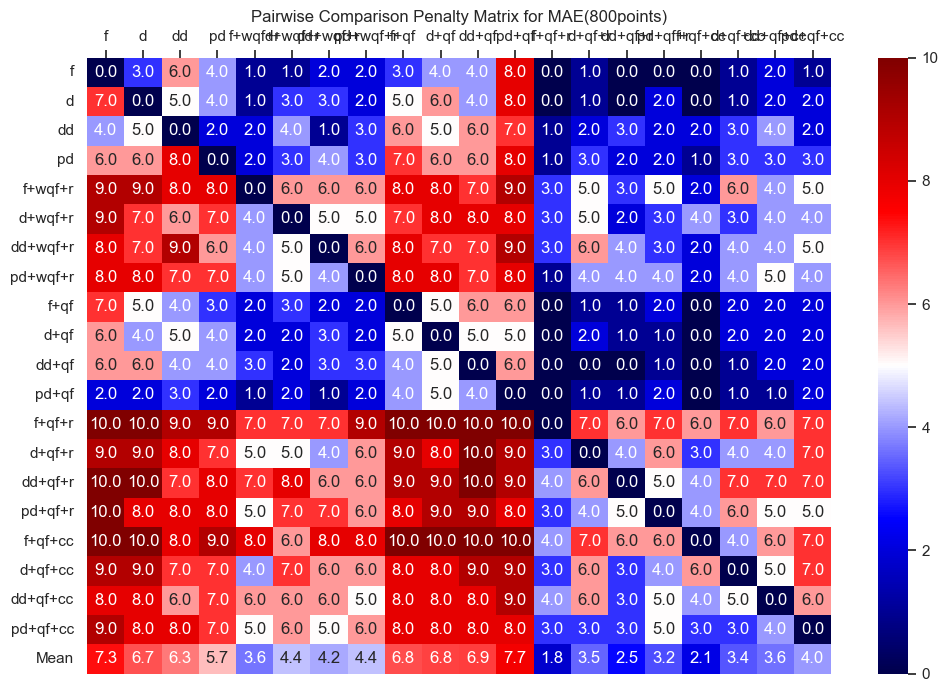

In [ ]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'qf+r', 'qf', 'wqf+res']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0558495479792267, 0.06213956739094921, 0.0034300890504194016, 0.001675891249254928, 0.0011576020260240382, 0.0019914475616785486, 0.007101203446260152, 0.006858624761946201, 0.0020611923027134354, 0.022130842386279003], 'qf+r': [4.174906189870655e-06, 2.528065143547662e-05, 7.624913860202969e-06, 2.2089832931181173e-06, 0.0026658621477811, 2.8633017722473e-06, 4.0748225736873465e-07, 3.795902050426067e-05, 0.001032997937836207, 0.0034398613634622345], 'qf': [8.312252171204167e-06, 0.05132672107087416, 2.6003991047872604e-05, 0.01812666097928299, 0.02047494959255969, 4.1049231667318554e-05, 0.1298346430694103, 0.0009651533998226177, 0.0006557331114525573, 0.0003786504701591552], 'wqf+res': [3.5647131745516904e-06, 0.0005811113087437917, 0.018499065884003615, 3.354063522528247e-06, 2.3430600436228133e-05, 7.357851373057327e-06, 4.44075801856015e-05, 3.594819786672292e-05, 0.001116999653072308, 0.03682

In [140]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

Methods: ['f', 'd', 'dd', 'pd', 'f+wqf+r', 'd+wqf+r', 'dd+wqf+r', 'pd+wqf+r', 'f+qf', 'd+qf', 'dd+qf', 'pd+qf', 'f+qf+r', 'd+qf+r', 'dd+qf+r', 'pd+qf+r', 'f+qf+cc', 'd+qf+cc', 'dd+qf+cc', 'pd+qf+cc']
Seeds: range(0, 10)
Loss Values: {'f': [0.005862603142119275, 0.008265640079077916, 0.01908419309635283, 0.04243517238062584, 0.0009045995865787871, 0.004745753205823981, 0.030613191621766074, 0.03833544369078137, 0.033866443216090204, 0.031799613037371756], 'd': [0.0558495479792267, 0.06213956739094921, 0.0034300890504194016, 0.001675891249254928, 0.0011576020260240382, 0.0019914475616785486, 0.007101203446260152, 0.006858624761946201, 0.0020611923027134354, 0.022130842386279003], 'dd': [0.0004976477436286188, 0.033107717292010494, 0.0032967049456180835, 0.06959952994649514, 0.001183917983395741, 0.030075370331421967, 1.7813029013822053e-05, 2.055118125062805e-06, 0.042954374919069865, 0.04078632575809751], 'pd': [0.00015373406910276693, 0.026042986887137756, 0.0020636920256982645, 0.0446

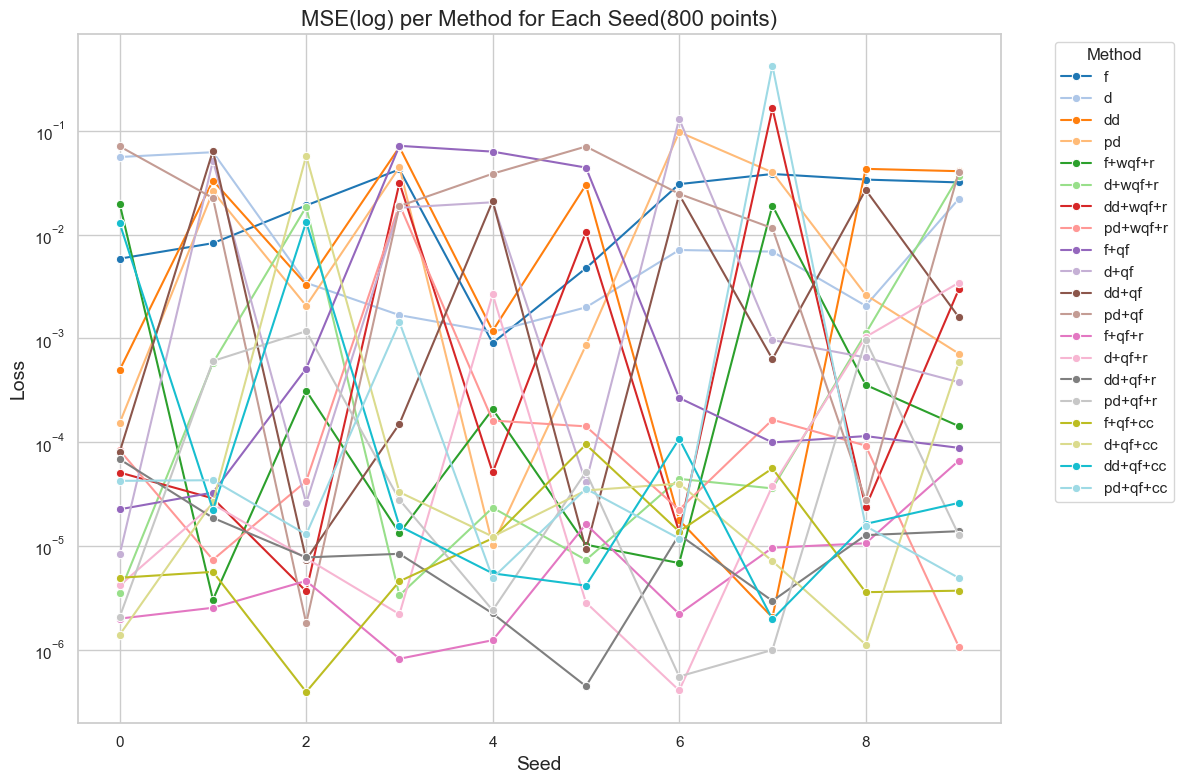

In [141]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

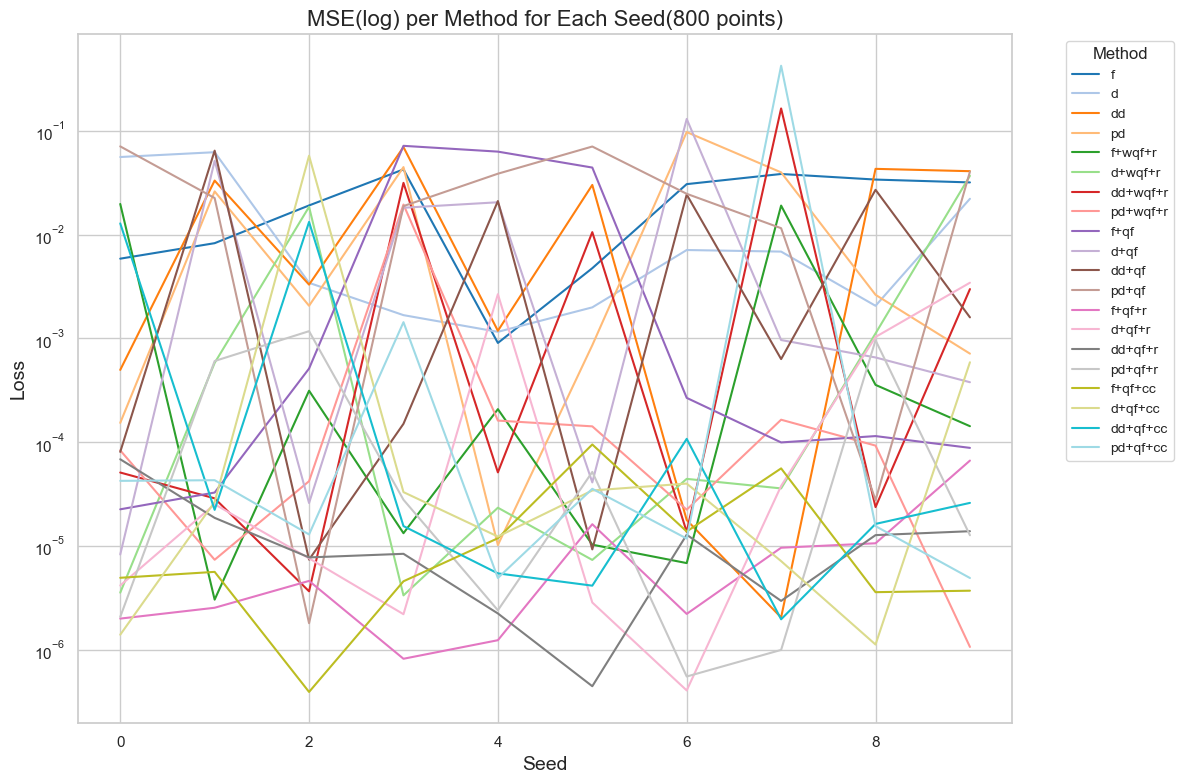

In [142]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


C:\Users\lcy\AppData\Local\Temp\ipykernel_109056\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


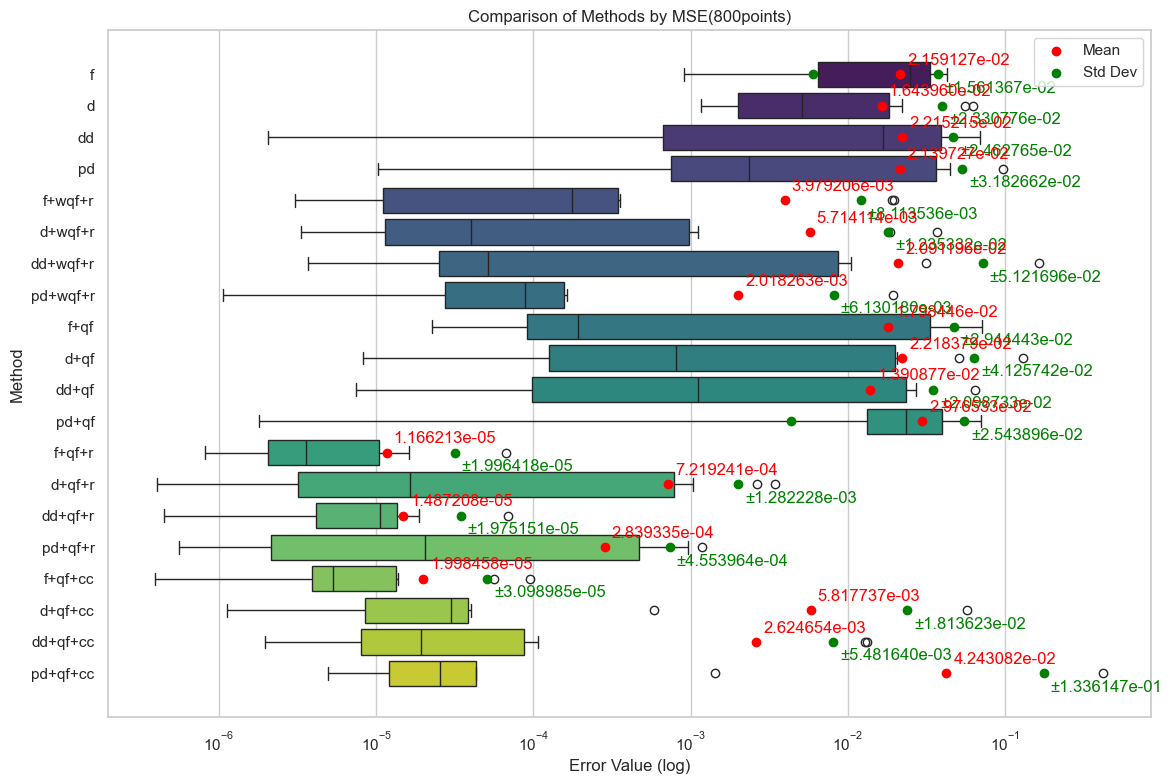

In [143]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



In [144]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


KeyError: 'PINN'

In [ ]:
np.sqrt(2.889226e-06)

0.0016997723376970223